# Course: **COMP 333 — Final Project Phase 1**
**Group:** O <br>
**Names:**
- Carson Johnston - **Student ID:** 40312846
- Charlotte Lauzon - **Student ID:** 40285642
- Ava Samimi - **Student ID:** 40048117

## Description of the task:
The objective of Phase 1 of this project is to select a large, real world dataset (>= 1GB). We then do the data retrieval, the wrangling, an EDA with 2 research questions, a baseline model and a report on Jupyter Notebook.

## Source of the datasets:
The **US Used Cars** dataset is a public dataset available on Kaggle: <br> https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset

## Description of the datasets:
The **US Used Cars** dataset exceeds the minimum size requirements, has a large number of features, includes real world inconsistencies and supports both supervised and unsupervised learning tasks.

It contains detailed information about 3 million used cars details across the United States.<br>
Each row represents a single vehicle listing, wth each column being an attribute.

**The *US Used Cars* dataset contains:**
- Vehicle Identification (Vehicle identification number, listing ID)
- Vehicle Specifications (Engines, horsepower, fuel, size, legroom, bed, body...)
- Market/Dealer Information (city, ZIP, position, days on market, date of listing)
- Fuel efficiency
- Condition and History (accidents, damages, if it was a cab, if it is new...)
- Categorical and Descriptive Features (colours, description, picture...)

The dataset has a mix of numerical, boolean, high-cardinality categorical and string variables

**The notebook will include: **
1. Data Retrieval
2. Wrangling/Cleaning
3. EDA
4. Baseline Model
5. Report


In [12]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec
from pandas.api.types import is_numeric_dtype, is_bool_dtype
import warnings

# Avoid unnecessary warnings in output
#warnings.filterwarnings("ignore")

# Doesn't cut tables
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

# Apply predefined visual theme for consistence in the export
plt.style.use('seaborn-v0_8')
sns.set_theme()

## 1. Data Retrieval: Phase 1 – Step 1

### 1.1 Source
We are using the **US Used Cars** public dataset from Kaggle:
https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset

This dataset is downloaded as a csv file, and has a size of 9.98 Go

### 1.2 Retrieval
The dataset is retrieved as a **file-based source csv** and is loaded into Python using the pandas function (`read_csv`).
We retrieved the data as a CSV file because the data is structured and tabular, it is delivered by Kaggle as a flat file.

Kaggle provides the dataset as a downloadable csv file. Since the dataset is static, the most reproducible and efficient approach is to store the raw file locally and load it consistently.

### 1.3 Challenge Handling
- **Large file size:** Because the Data file is nearly 10 Go, the direct loading can be slow and memory-heavy.
  - Mitigation: we use `low_memory=False`. This makes sure the entire file is read before deciding the columns' data type, which leads to less dtypewarning
- **Authentication / rate limits:** not applicable because we are not calling an API endpoint in this phase (download is done once via Kaggle).
  - If we use Kaggle API later, authentication would require a Kaggle API token. However, for this phase, one static file download was more efficient and safe.

### 1.4 Raw Data Storage
The dataset is stored in the `data/raw/` folder and is treated as read-only.

In [2]:
import os
raw_data_path = "data/raw/used_cars_data.csv"

# Load the raw dataset
cars = pd.read_csv(raw_data_path, low_memory=False)

print("Shape:", cars.shape)
cars.head()

Shape: (3000040, 66)


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [5]:
# TEST DATASET

raw_data_path = "data/raw/used_cars_data.csv"

# which columns we are loading into the dataframe
#desired_columns = ['body_type', 'city', 'engine_type', 'has_accidents', 'highway_fuel_economy', 'horsepower', 'make_name', 'mileage', 'model_name', 'price', 'wheelbase', 'year']

# For first 1000 rows
testing_cars = pd.read_csv(raw_data_path, nrows=1000, usecols=desired_columns, low_memory=False)
print("Shape:", testing_cars.shape)
testing_cars.head()

Shape: (1000, 12)


,body_type,city,engine_type,has_accidents,highway_fuel_economy,horsepower,make_name,mileage,model_name,price,wheelbase,year
0,SUV / Crossover,Bayamon,I4,NaN,NaN,177.0,Jeep,7.0,Renegade,23141.0,101.2 in,2019
1,SUV / Crossover,San Juan,I4,NaN,NaN,246.0,Land Rover,8.0,Discovery Sport,46500.0,107.9 in,2020
2,Sedan,Guaynabo,H4,False,23.0,305.0,Subaru,NaN,WRX STI,46995.0,104.3 in,2016
3,SUV / Crossover,San Juan,V6,NaN,NaN,340.0,Land Rover,11.0,Discovery,67430.0,115 in,2020
4,SUV / Crossover,San Juan,I4,NaN,NaN,246.0,Land Rover,7.0,Discovery Sport,48880.0,107.9 in,2020


## 2. Wrangling/Cleaning: Phase 1 – Step 2

We perform an initial data audit:
- Missing value analysis
- Duplicate detection
- Outlier detection
- Data type validation
- Reproducible cleaning pipeline

We use the `quantDDA()` and `vizDDA()` functions from Lab 2 to standardize our audit process.

In [6]:
# The function quantDDA(df) takes a pandas DataFrame as argument
# The function returns a new DataFrame with a summary of each column
def quantDDA(df):

# create a list to put all column's summary in
    summary_list = []

# Loop through all columns of the argument dataset
    for column in df.columns:
        # One column is a series, we create a dictionary to store the statistics
        series = df[column]
        summary = {}

        # Store the column name as the feature
        summary["Feature"] = column
        # Store the number of rows of the database
        summary["Number of Observations"] = len(series)
        # Store the number of only valid, non-missing values
        summary["Number of Entries"] = series.count()
        # Store the number of distinct values only
        summary["Number of Unique Entries"] = series.nunique()
        # Store the number of missing values (where its n/a is "true")
        summary["Number of Missing Entries"] = series.isna().sum()

        # Store the mode values as a list
        modes = series.mode()
        summary["Mode(s)"] = list(modes)

        # The categorical columns do not have all the numeric fields;
        # To make sure the table has no issues with columns, we set as NaN
        summary["Number of Outliers (IQR)"] = np.nan
        summary["Number of Extreme Values (top/bottom 1%)"] = np.nan
        summary["Mean"] = np.nan
        summary["Standard Deviation"] = np.nan
        summary["Maximum"] = np.nan
        summary["Minimum"] = np.nan
        summary["Q1"] = np.nan
        summary["Q2 (Median)"] = np.nan
        summary["Q3"] = np.nan
        summary["Skewness"] = np.nan
        summary["Kurtosis"] = np.nan

        # If its numerical column, compute numeric statistics
        # Otherwise, skip the calculations
        if pd.api.types.is_numeric_dtype(series) and not pd.api.types.is_bool_dtype(series):
            # We remove missing values to not compute with invalid numbers
            # pandas ignore NaN, but not SciPy, so we drop beforehand
            x = series.dropna()

            # Store all the numerical statistics
            if len(x) > 0:
                summary["Mean"] = x.mean()
                summary["Standard Deviation"] = x.std()
                summary["Maximum"] = x.max()
                summary["Minimum"] = x.min()
                summary["Q1"] = x.quantile(0.25)
                summary["Q2 (Median)"] = x.median()
                summary["Q3"] = x.quantile(0.75)

                # Number of outliers with IQR Method
                IQR = summary["Q3"] - summary["Q1"]
                lower = summary["Q1"] - 1.5 * IQR
                upper = summary["Q3"] + 1.5 * IQR
                # Count values outside the lower and upper bounds
                outliers = x[(x < lower) | (x > upper)]
                summary["Number of Outliers (IQR)"] = outliers.count()

                # Extreme values (Top and Bottom 1%)
                lower_ext = x.quantile(0.01)
                upper_ext = x.quantile(0.99)
                # Counts the number of extreme values of the top and bottom 1%
                extreme = x[(x < lower_ext) | (x > upper_ext)]
                summary["Number of Extreme Values (top/bottom 1%)"] = extreme.count()

                # Use SciPy for skewness and kurtosis
                summary["Skewness"] = stats.skew(x, bias=False)
                summary["Kurtosis"] = stats.kurtosis(x, fisher=True, bias=False)

        # Add the dictionary to list
        summary_list.append(summary)

    result = pd.DataFrame(summary_list)

    # Make sure the columns are in the same order as in assignment
    ordered_columns = [
        "Feature",
        "Number of Observations",
        "Number of Entries",
        "Number of Unique Entries",
        "Number of Missing Entries",
        "Number of Outliers (IQR)",
        "Number of Extreme Values (top/bottom 1%)",
        "Mode(s)",
        "Mean",
        "Standard Deviation",
        "Maximum",
        "Minimum",
        "Q1",
        "Q2 (Median)",
        "Q3",
        "Skewness",
        "Kurtosis"
    ]

    return result[ordered_columns]

In [7]:
# The function vizDDA(df) takes a pandas DataFrame as argument
# The function produces a square grid of plots (univariate on diagonal, bivariate off diagonal),
# and a heatmap of the missing values.
def vizDDA(df):

    df = df.copy()

    # Remove high-cardinality categorical columns for visualization grid
    high_cardinality_cols = []

    for col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            # put an arbitrary 20 threshold
            if df[col].nunique() > 20:
                high_cardinality_cols.append(col)
    # df for the plots
    df_plot = df.drop(columns=high_cardinality_cols)

    num_features = len(df_plot.columns)

    # Detect datetime columns
    is_datetime = {
        column: pd.api.types.is_datetime64_any_dtype(df_plot[column])
        for column in df_plot.columns
    }

    # Create square grid
    # put 4x4 inch space for each subplot for readability
    fig = plt.figure(figsize=(4 * num_features, 4 * num_features))
    grid = gridspec.GridSpec(num_features, num_features)

    # Consider i as index for rows, and j as index for columns
    for i, col_i in enumerate(df_plot.columns):
        for j, col_j in enumerate(df_plot.columns):

            ax = fig.add_subplot(grid[i, j])

            # Detect if its numeric or categorical
            is_num_i = pd.api.types.is_numeric_dtype(df_plot[col_i])
            is_num_j = pd.api.types.is_numeric_dtype(df_plot[col_j])

            # Univariate on diagonal
            # if we compare a feature with itself, we are doing a univariate analysis
            if i == j:

                # If it's a datetime univariate, we count how many times each unique datetime appear
                if is_datetime[col_i]:
                    series = df_plot[col_i].dropna()
                    if len(series) > 0:
                        series.value_counts().sort_index().plot(ax=ax)
                    ax.set_ylabel("count")

                # if numeric, we do a histogram to visualize the distribution
                elif is_num_i:
                    sns.histplot(df_plot[col_i], kde=True, ax=ax)

                # For categorical univariate, we do a bar chart
                else:
                    df_plot[col_i].value_counts().plot(kind="bar", ax=ax)

            # Bivariate off diagonal
            # We study two different variables
            else:

                # If one variable is datetime, and the other is numeric:
                # We do a line plot
                # Datetime vs Numeric when datetime is the row variable, and numeric is column variable
                if is_datetime[col_i] and is_num_j:
                    # Select the relevant columns, drop the missing values, and sort by the datetime column
                    tmp = df_plot[[col_i, col_j]].dropna().sort_values(col_i)
                    # We draw datetime on x-axis, numeric on y-axis
                    ax.plot(tmp[col_i], tmp[col_j])

                # Same but for the symmetric situation;
                # Datetime vs Numeric when datetime is the column variable, and numeric is row variable
                elif is_datetime[col_j] and is_num_i:
                    tmp = df_plot[[col_j, col_i]].dropna().sort_values(col_j)
                    ax.plot(tmp[col_j], tmp[col_i])

                # If both variables are numeric (Numeric vs numeric), we do a scatter plot
                elif is_num_i and is_num_j:
                    sns.scatterplot(x=df_plot[col_j], y=df_plot[col_i], ax=ax)

                # If there are mixed types (categorical vs numeric) we do a boxplot
                # For when numerical is the row feature and categorical is the column feature
                elif is_num_i and not is_num_j:
                    sns.boxplot(x=df_plot[col_j], y=df_plot[col_i], ax=ax)

                # For when numerical is the column feature and categorical is the row feature
                elif not is_num_i and is_num_j:
                    sns.boxplot(x=df_plot[col_i], y=df_plot[col_j], ax=ax)

                # If both variable are categorical (Categorical vs categorical), we do a grouped bar chart
                # Since all cases with numerical variables have been checked,
                # only categorical on both row and colum left
                else:
                    categorical = pd.crosstab(df_plot[col_i], df_plot[col_j])
                    categorical.plot(kind="bar", ax=ax)

            # Axis labeling
            # Only label bottom row with x labels
            if i == num_features - 1:
                ax.set_xlabel(col_j, fontsize=15, fontweight="bold")
            else:
                ax.set_xlabel("")

            # Only label left column with y labels
            if j == 0:
                ax.set_ylabel(col_i, fontsize=15, fontweight="bold")
            else:
                ax.set_ylabel("")

    # Add title
    fig.suptitle("Visualization Grid (Univariate on Diagonal, Bivariate Off-Diagonal)", fontsize=25, fontweight="bold")
    # Improve spacing so subplots don't overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Heatmap of missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isna(), cbar=True, vmin=0, vmax=1)
    plt.title("Missing Values Heatmap")
    plt.show()

In [8]:
quantDDA(testing_cars)

,Feature,Number of Observations,Number of Entries,Number of Unique Entries,Number of Missing Entries,Number of Outliers (IQR),Number of Extreme Values (top/bottom 1%),Mode(s),Mean,Standard Deviation,Maximum,Minimum,Q1,Q2 (Median),Q3,Skewness,Kurtosis
0,body_type,1000,996,9,4,NaN,NaN,[SUV / Crossover],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,city,1000,1000,10,0,NaN,NaN,[Bay Shore],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,engine_type,1000,985,15,15,NaN,NaN,[I4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,has_accidents,1000,734,2,266,NaN,NaN,[False],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,highway_fuel_economy,1000,739,32,261,10.0,14.0,[25.0],27.782138,5.738654,53.0,14.0,24.0,27.0,31.00,0.794391,1.085296
5,horsepower,1000,976,166,24,14.0,19.0,[355.0],249.865779,88.031844,797.0,78.0,180.0,246.0,300.00,1.271260,3.703373
6,make_name,1000,1000,33,0,NaN,NaN,[Chevrolet],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,mileage,1000,965,757,35,5.0,10.0,[0.0],49944.461140,50484.144123,220355.0,0.0,147.0,36261.0,79364.00,1.012436,0.251962
8,model_name,1000,1000,230,0,NaN,NaN,[Grand Cherokee],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,price,1000,1000,713,0,74.0,19.0,[4999.0],24844.188000,17629.567369,135465.0,1850.0,13332.0,22055.0,30007.25,1.888328,5.424457


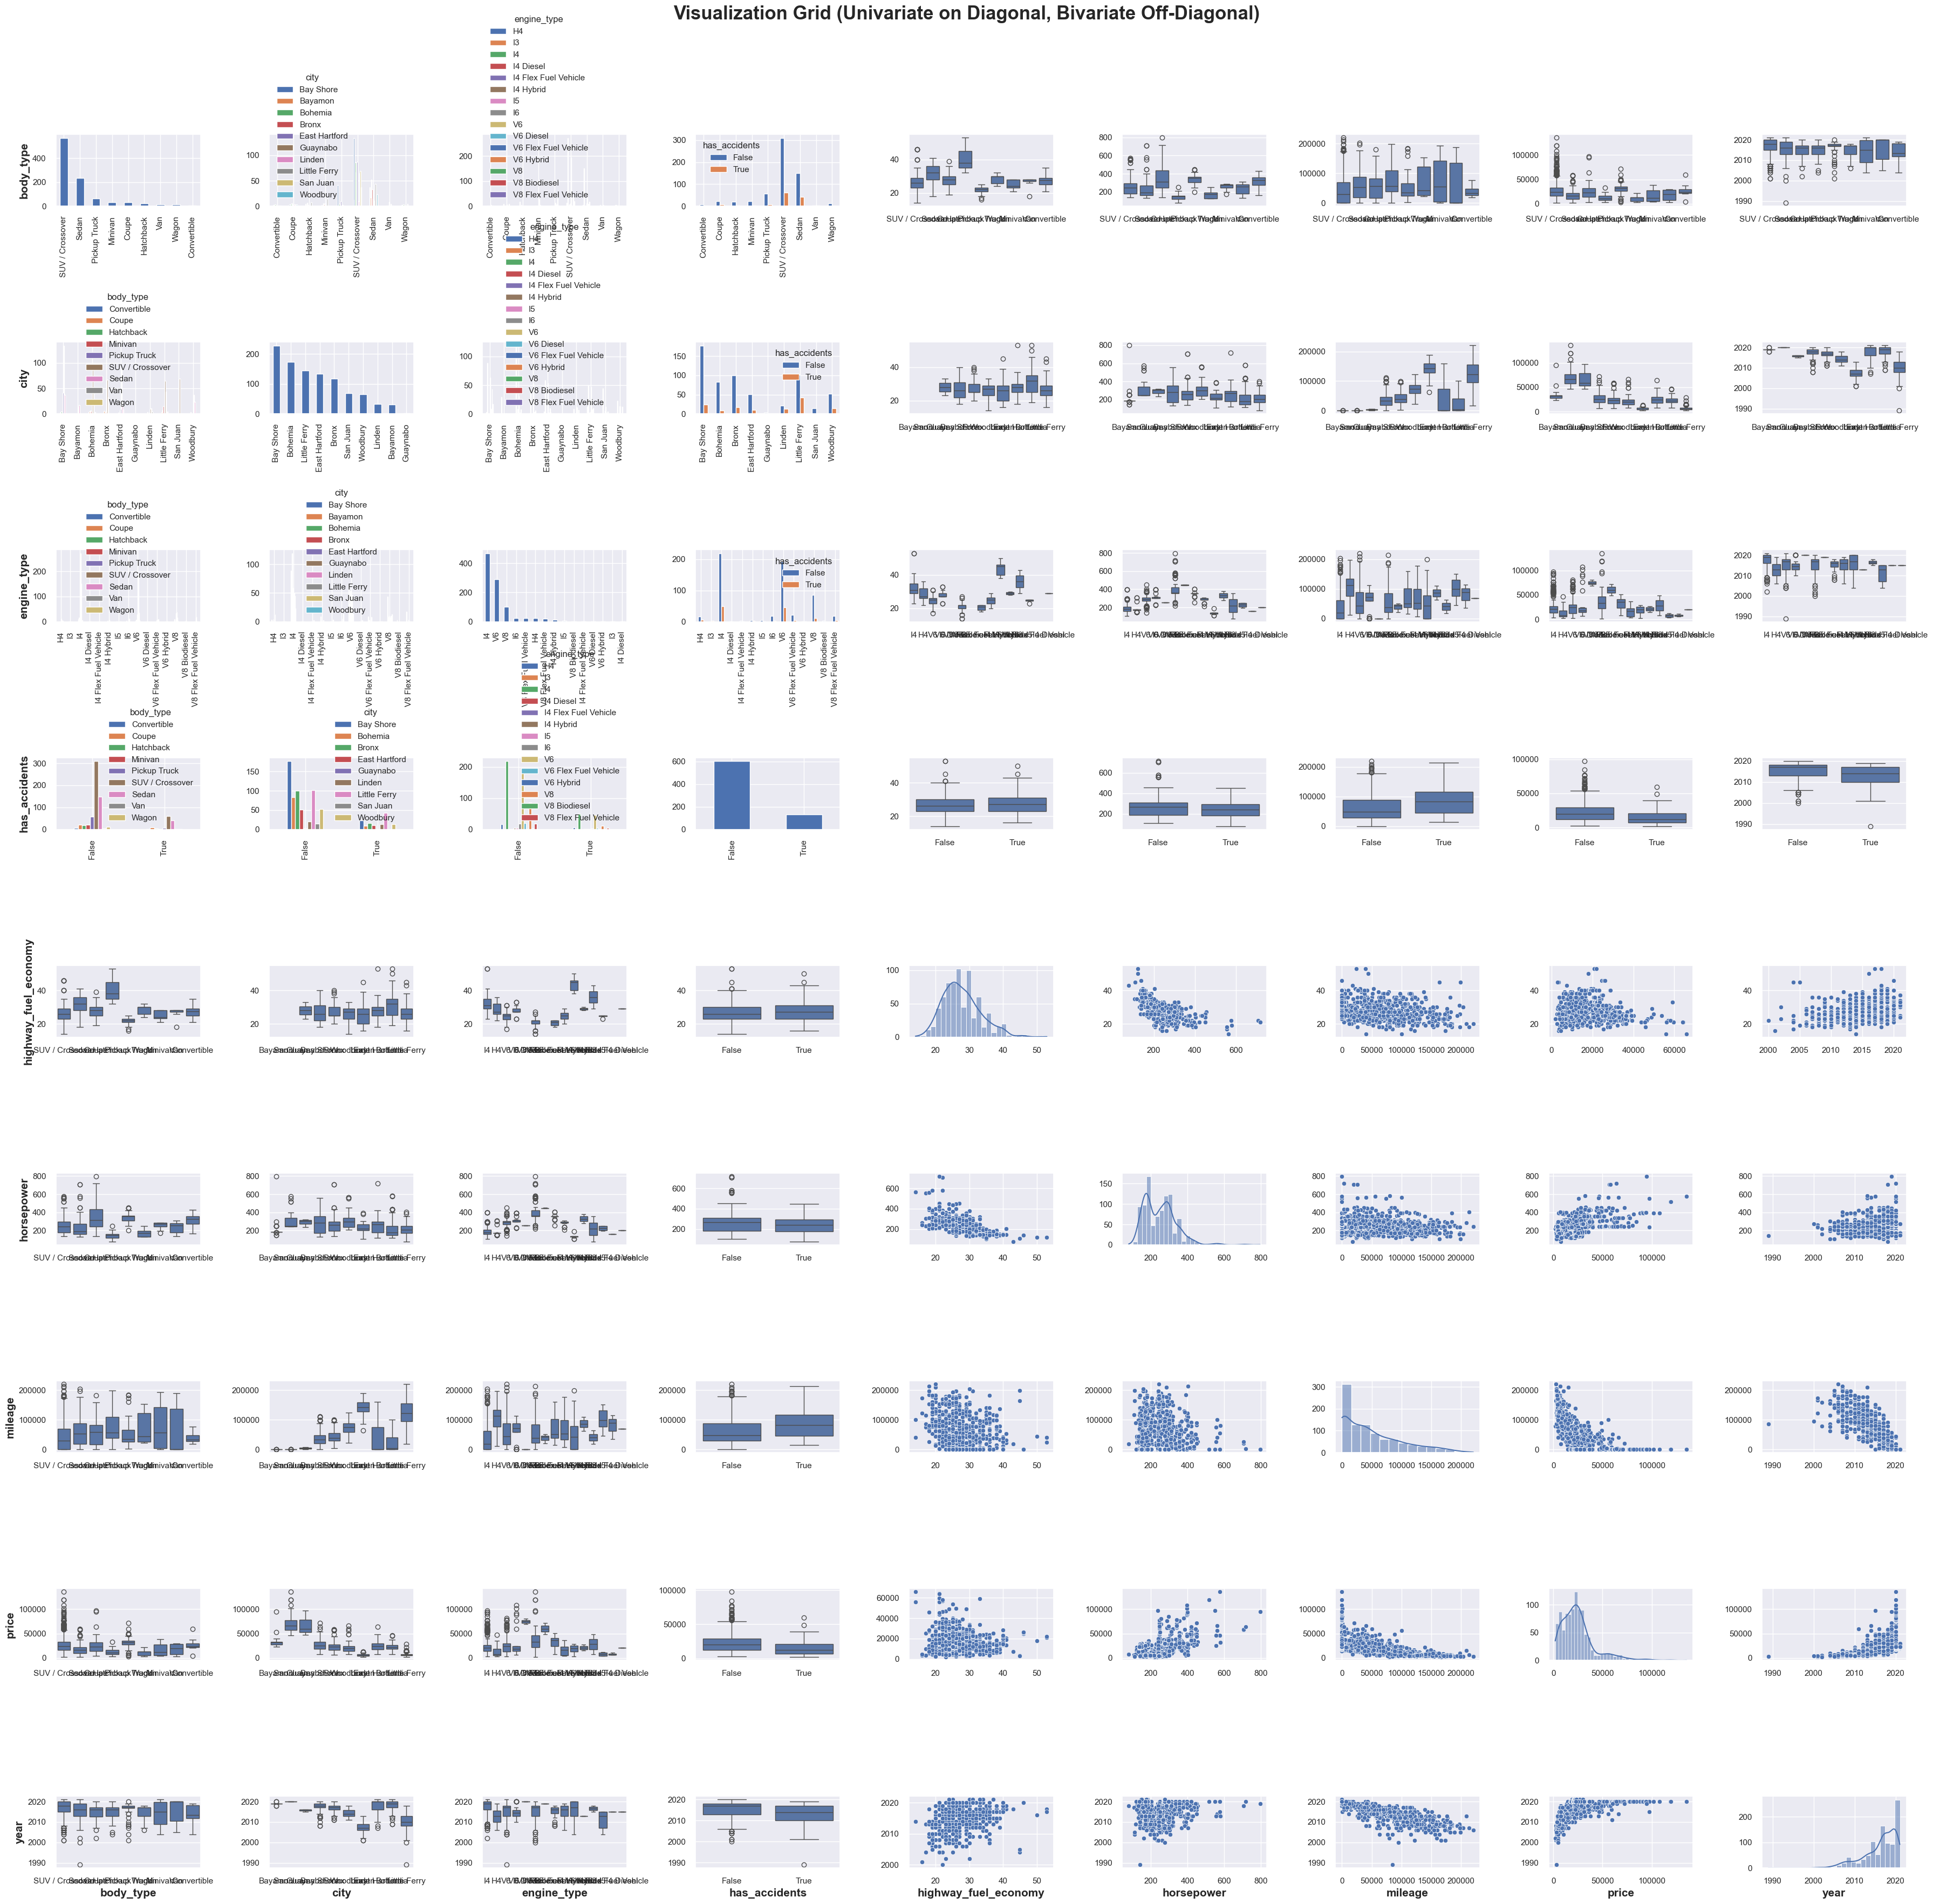

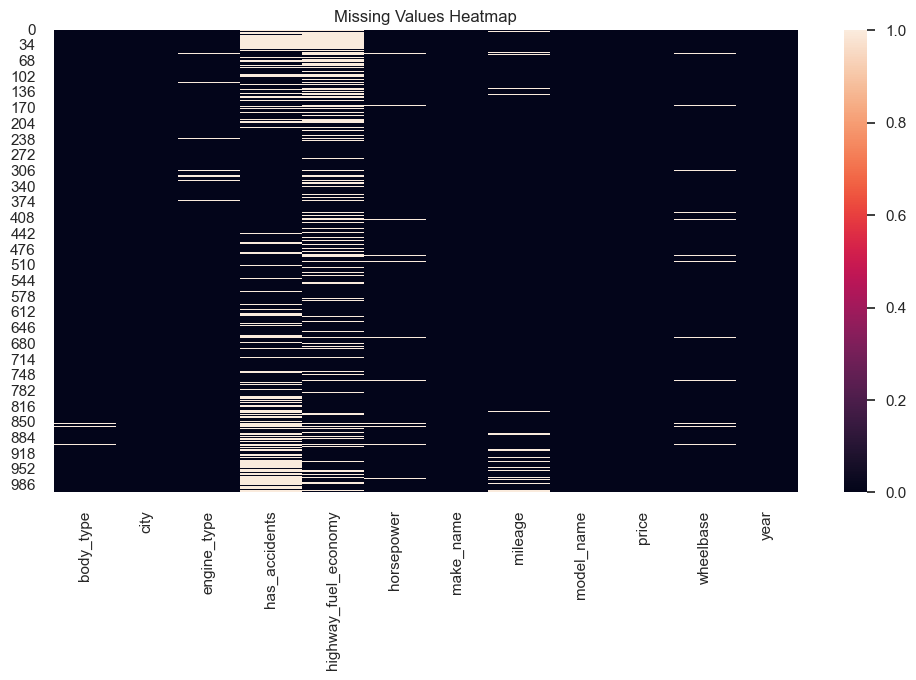

In [9]:
vizDDA(testing_cars)

EXPLANATION OF AUDIT


THEN FROM WEEK 7: missing value, duplicate, outlier, normalize, reproducable cleaning pipeline

In [ ]:
# Stuff to add here for everything

In [15]:
#Create function for pipeline
def clean_cars(df, drop_missing_threshold=0.95):
    df = df.copy()

    report = {}

    # Drop columns with extremely high missingness
    missing_rate = df.isna().mean()
    drop_cols = missing_rate[missing_rate > drop_missing_threshold].index.tolist()
    df = df.drop(columns=drop_cols)
    report["dropped_cols_high_missing"] = drop_cols

    # Remove row duplicates
    before = len(df)
    df = df.drop_duplicates()
    report["rows_removed_duplicates"] = before - len(df)

    # Missing values
    # Numeric columns: add missing flag
    imputed_numeric = []
    for col in df.columns:
        if is_numeric_dtype(df[col]) and not is_bool_dtype(df[col]):
            if df[col].isna().any():
                df[f"{col}_missing"] = df[col].isna()
                df[col] = df[col].fillna(df[col].median())
                imputed_numeric.append(col)
    report["numeric_imputed_with_flags"] = imputed_numeric

    # For categorical columns: fill missing with label
    filled_categorical = []
    for col in df.columns:
        if df[col].dtype == "object" and df[col].isna().any():
            df[col] = df[col].fillna("Missing")
            filled_categorical.append(col)
    report["categorical_filled"] = filled_categorical

    # String unification
    for col in df.select_dtypes(include=["object", "string"]).columns:
        df[col] = df[col].astype(str).str.strip()

    return df, report


In [16]:
cars_clean, cleaning_report = clean_cars(testing_cars)
cleaning_report

{'dropped_cols_high_missing': [],
 'rows_removed_duplicates': 35,
 'numeric_imputed_with_flags': ['highway_fuel_economy',
  'horsepower',
  'mileage'],
 'categorical_filled': ['has_accidents']}

In [17]:
cars_clean.head()

,body_type,city,engine_type,has_accidents,highway_fuel_economy,horsepower,make_name,mileage,model_name,price,wheelbase,year,highway_fuel_economy_missing,horsepower_missing,mileage_missing
0,SUV / Crossover,Bayamon,I4,Missing,27.0,177.0,Jeep,7.0,Renegade,23141.0,101.2 in,2019,True,False,False
1,SUV / Crossover,San Juan,I4,Missing,27.0,246.0,Land Rover,8.0,Discovery Sport,46500.0,107.9 in,2020,True,False,False
2,Sedan,Guaynabo,H4,False,23.0,305.0,Subaru,37432.0,WRX STI,46995.0,104.3 in,2016,False,False,True
3,SUV / Crossover,San Juan,V6,Missing,27.0,340.0,Land Rover,11.0,Discovery,67430.0,115 in,2020,True,False,False
4,SUV / Crossover,San Juan,I4,Missing,27.0,246.0,Land Rover,7.0,Discovery Sport,48880.0,107.9 in,2020,True,False,False


In [18]:
quantDDA(cars_clean)

,Feature,Number of Observations,Number of Entries,Number of Unique Entries,Number of Missing Entries,Number of Outliers (IQR),Number of Extreme Values (top/bottom 1%),Mode(s),Mean,Standard Deviation,Maximum,Minimum,Q1,Q2 (Median),Q3,Skewness,Kurtosis
0,body_type,965,961,9,4,NaN,NaN,[SUV / Crossover],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,city,965,965,10,0,NaN,NaN,[Bay Shore],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,engine_type,965,950,15,15,NaN,NaN,[I4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,has_accidents,965,965,3,0,NaN,NaN,[False],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,highway_fuel_economy,965,965,32,0,88.0,17.0,[27.0],27.502591,4.962436,53.0,14.0,25.0,27.0,29.0,1.065556,2.727438
5,horsepower,965,965,166,0,14.0,19.0,[246.0],251.875648,87.274470,797.0,78.0,180.0,246.0,300.0,1.277729,3.867053
6,make_name,965,965,33,0,NaN,NaN,[Chevrolet],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,mileage,965,965,757,0,9.0,10.0,[10.0],50642.568912,50045.159745,220355.0,0.0,3688.0,37432.0,79364.0,1.015674,0.291267
8,model_name,965,965,230,0,NaN,NaN,[Grand Cherokee],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,price,965,965,713,0,73.0,19.0,[4999.0],24781.434197,17910.899647,135465.0,1850.0,12999.0,21993.0,30029.0,1.874610,5.220504


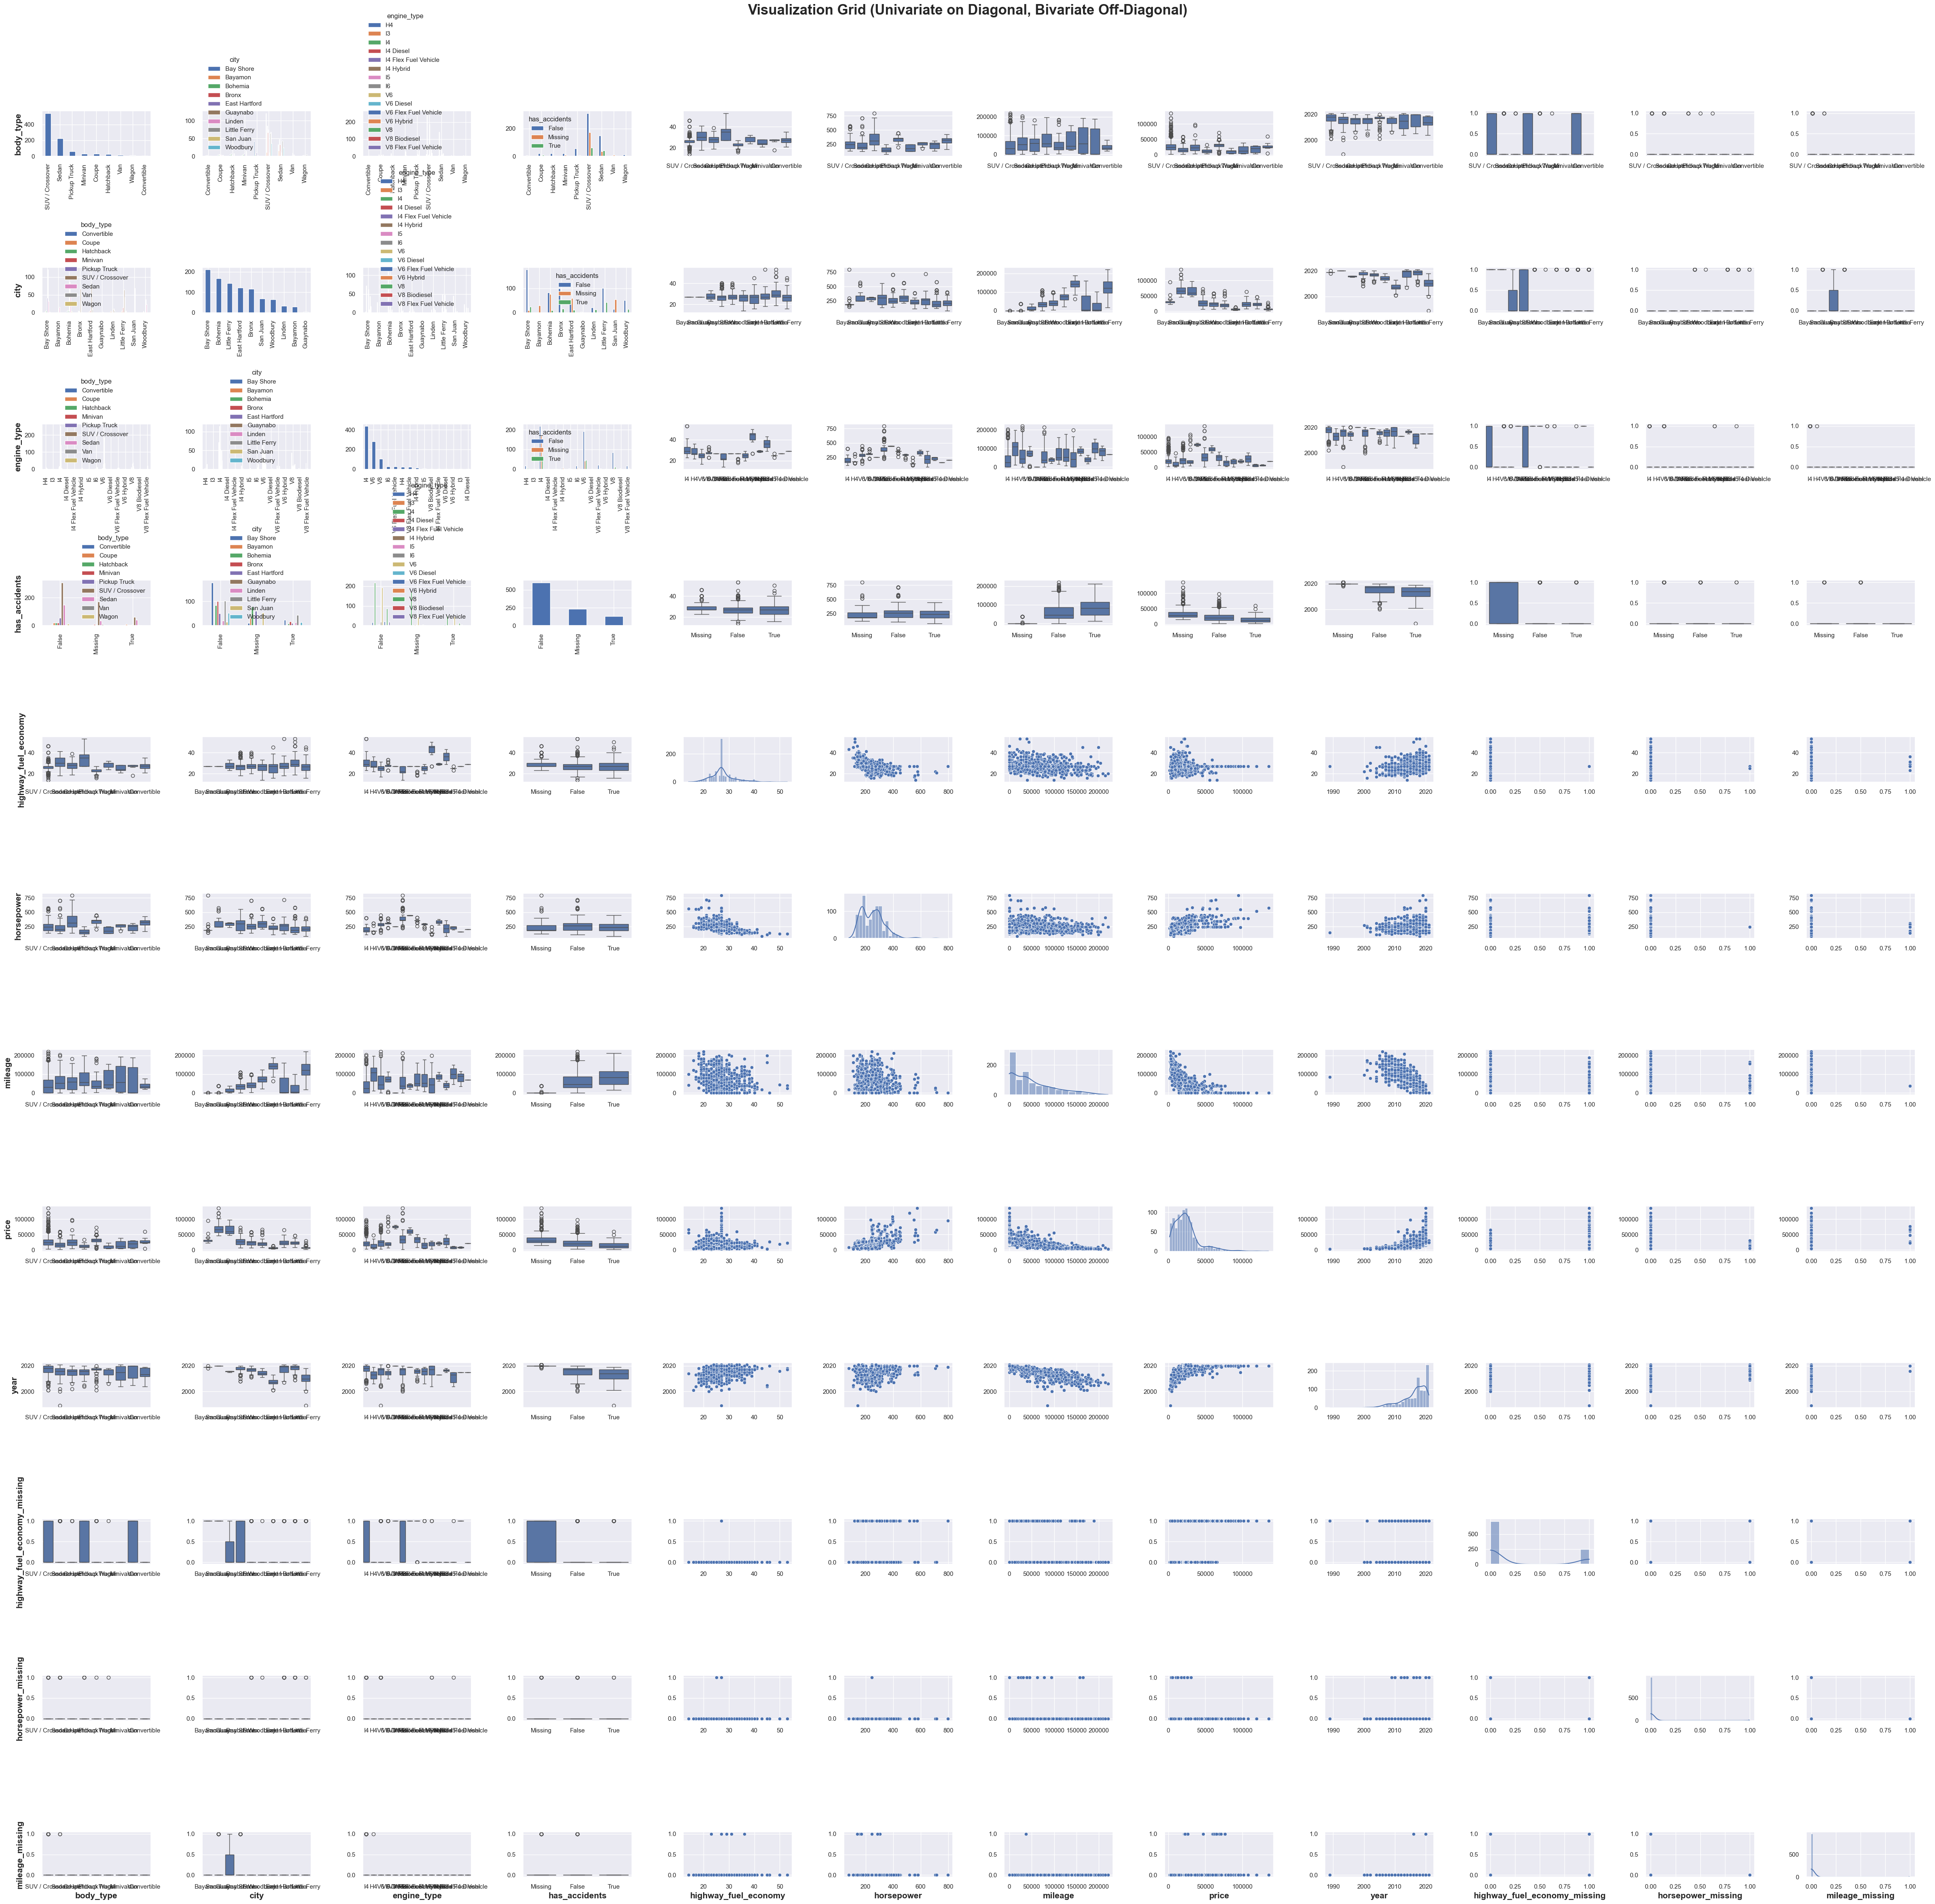

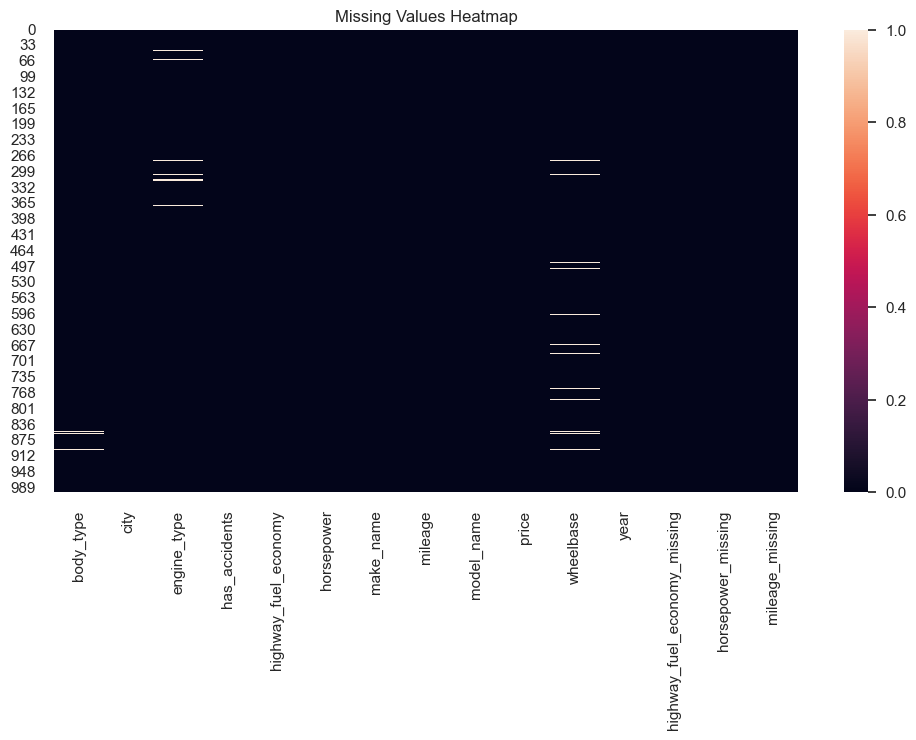

In [19]:
vizDDA(cars_clean)

## 3. Exploratory Data Analysis (EDA)

3.4 Research Questions
- Supervised Question:
- Unsupervised Question:
